In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/"My Drive"/"DA_KTDL"/

/content/drive/My Drive/DA_KTDL


# Part 1. Data Cleaning

In [0]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

data = pd.read_csv('bank-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
#Xử lý dữ liệu thiếu:
#Tập dữ liệu không có dữ liệu thiếu, nhưng các giá trị như unknown hay other không giúp ích nhiều nên được xem như là dữ liệu thiếu, ta cần loại bỏ chúng.

In [0]:
data.poutcome

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
45206    unknown
45207    unknown
45208    success
45209    unknown
45210      other
Name: poutcome, Length: 45211, dtype: object

In [0]:
condition=data.poutcome=='other'
data=data.drop(data[condition].index, axis=0, inplace=False)
data.poutcome

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
45205    unknown
45206    unknown
45207    unknown
45208    success
45209    unknown
Name: poutcome, Length: 43371, dtype: object

In [0]:
#Drop các mẫu dữ liệu outlier trong thuộc tính Balance (tiền dư hằng năm)
data.balance

0        2143
1          29
2           2
3        1506
4           1
         ... 
45205     505
45206     825
45207    1729
45208    5715
45209     668
Name: balance, Length: 43371, dtype: int64

In [0]:
from scipy.stats import zscore

data['balance_outlier']= data['balance']
data['balance_outlier']= zscore(data['balance_outlier'])

condition1 = (data['balance_outlier']>3) | (data['balance_outlier']<-3 )
data = data.drop(data[condition1].index, axis = 0, inplace = False)
data.drop('balance_outlier', axis=1)
data.balance

0        2143
1          29
2           2
3        1506
4           1
         ... 
45205     505
45206     825
45207    1729
45208    5715
45209     668
Name: balance, Length: 42655, dtype: int64

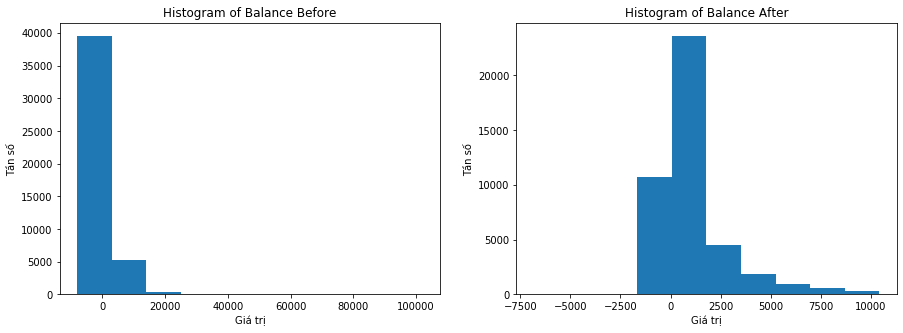

In [0]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Histogram of Balance Before')
plt.xlabel('Giá trị')
plt.ylabel('Tần số')
plt.hist(dataset.balance, 10)

plt.subplot(1,2,2)
plt.title('Histogram of Balance After')
plt.xlabel('Giá trị')
plt.ylabel('Tần số')
plt.hist(data.balance, 10)

plt.show()

In [0]:
#Chuẩn hóa 0-no và 1-yes
data['y'].replace(['no', 'yes'],[0,1], inplace=True)
data.y

0        0
1        0
2        0
3        0
4        0
        ..
45205    1
45206    1
45207    1
45208    1
45209    0
Name: y, Length: 42655, dtype: int64

In [0]:
#Cột contact không có ý nghĩa, do liên hệ bằng smartphone hay cục gạch thì cũng giống nhau
data=data.drop('contact', axis=1)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42655 entries, 0 to 45209
Data columns (total 17 columns):
age                42655 non-null int64
job                42655 non-null object
marital            42655 non-null object
education          42655 non-null object
default            42655 non-null object
balance            42655 non-null int64
housing            42655 non-null object
loan               42655 non-null object
day                42655 non-null int64
month              42655 non-null object
duration           42655 non-null int64
campaign           42655 non-null int64
pdays              42655 non-null int64
previous           42655 non-null int64
poutcome           42655 non-null object
y                  42655 non-null int64
balance_outlier    42655 non-null float64
dtypes: float64(1), int64(8), object(8)
memory usage: 5.9+ MB


In [0]:
#Thay đổi thời gian liên lạc từ giây sang phút
data['duration'] = data['duration'].apply(lambda n:n/60.0).round(2)
print(data['duration']);

0         4.35
1         2.52
2         1.27
3         1.53
4         3.30
         ...  
45205     6.43
45206    16.28
45207     7.60
45208    18.78
45209     8.47
Name: duration, Length: 42655, dtype: float64


In [0]:
#Thay đổi tháng từ chuỗi sang số
lst = [data]
for column in lst:
    column.loc[column["month"] == "jan", "month"] = 1
    column.loc[column["month"] == "feb", "month"] = 2
    column.loc[column["month"] == "mar", "month"] = 3
    column.loc[column["month"] == "apr", "month"] = 4
    column.loc[column["month"] == "may", "month"] = 5
    column.loc[column["month"] == "jun", "month"] = 6
    column.loc[column["month"] == "jul", "month"] = 7
    column.loc[column["month"] == "aug", "month"] = 8
    column.loc[column["month"] == "sep", "month"] = 9
    column.loc[column["month"] == "oct", "month"] = 10
    column.loc[column["month"] == "nov", "month"] = 11
    column.loc[column["month"] == "dec", "month"] = 12
data['month']

0         5
1         5
2         5
3         5
4         5
         ..
45205    11
45206    11
45207    11
45208    11
45209    11
Name: month, Length: 42655, dtype: int64

In [0]:
#Xóa khách hàng có giá trị unknown tại trường educaton
condition3 = (data['education'] == 'unknown')
data = data.drop(data[condition3].index, axis = 0, inplace = False)

In [0]:
data['education']

0         tertiary
1        secondary
2        secondary
5         tertiary
6         tertiary
           ...    
45205    secondary
45206     tertiary
45207      primary
45208    secondary
45209    secondary
Name: education, Length: 40897, dtype: object

In [0]:
#Xóa các khách hàng có thời gian trao đổi nhỏ hơn 5s
condition4 = (data['duration']<5/60.0)
data = data.drop(data[condition4].index, axis = 0, inplace = False)
data['duration']

0         4.35
1         2.52
2         1.27
5         2.32
6         3.62
         ...  
45205     6.43
45206    16.28
45207     7.60
45208    18.78
45209     8.47
Name: duration, Length: 40841, dtype: float64

# Part 2. Exploratory Data Analysis

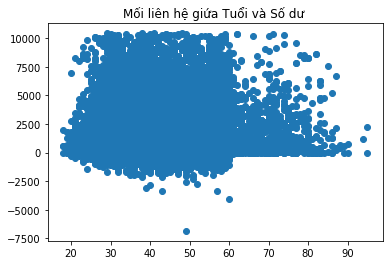

In [0]:
#Mối liên hệ giữa tuổi và số dư hằng năm
plt.scatter(data['age'],data['balance'])

plt.title('Mối liên hệ giứa Tuổi và Số dư ')
plt.show()

In [0]:
#Từ hình trên cho ta thấy: khi trên 60 tuổi thì thu nhập chủ yếu nhỏ hơn 5000 euro do hầu hết đã nghỉ hưu, đồng thời ít có số dư âm.

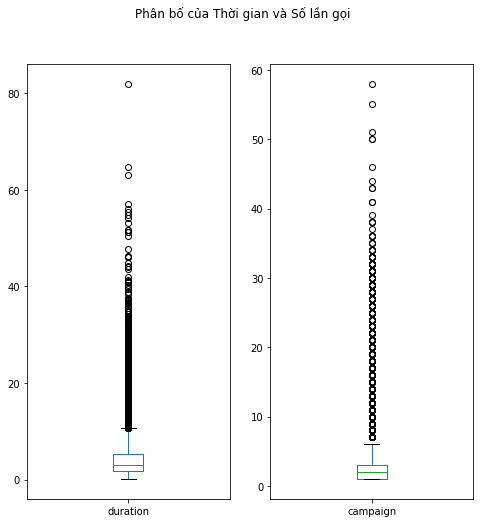

In [0]:
#Mối liên hệ giữa Thời gian và Số lần gọi
dist_dur_cam = data[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='Phân bố của Thời gian và Số lần gọi')
plt.show()

In [0]:
#Từ biểu đồ trên ta thấy: hầu hết các khách hàng được gọi trong thời gian 2->6 phút và số lần gọi nhiều nhất vào khoảng 2-3 lần.
#Tuy nhiên vẫn có một số trường hợp đặc biệt khi có thời gian trao đổi hơn 80 phút và cũng có số lần trao đổi gần 60 lần
#Chúng ta sẽ xem xét sau

In [0]:
data.rename(index=str, columns={'y': 'response'}, inplace = True)

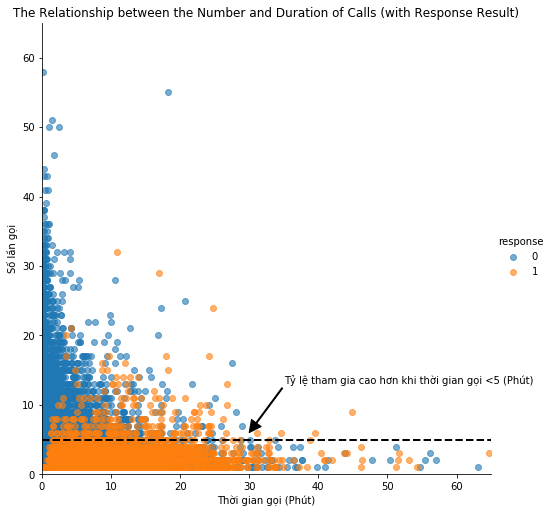

In [0]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = data,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Số lần gọi')
plt.xlabel('Thời gian gọi (Phút)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Tỷ lệ tham gia cao hơn khi thời gian gọi <5 (Phút)',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

In [0]:
#Nhìn vào biểu đồ ta thấy:
#Khi thời gian gọi từ 3->10 phút và số lần nhỏ hơn 5 thì hầu như 100% khách hàng sẽ đồng ý gửi tiền có kỳ hạn
#Khi số lần gọi càng nhiều thì khả năng khách hàng tham gia là rất thấp, việc này đồng nghĩa với việc khách hàng cảm thầy bị phiền hà nên ngân hàng thay đổi lại sao cho phù hợp

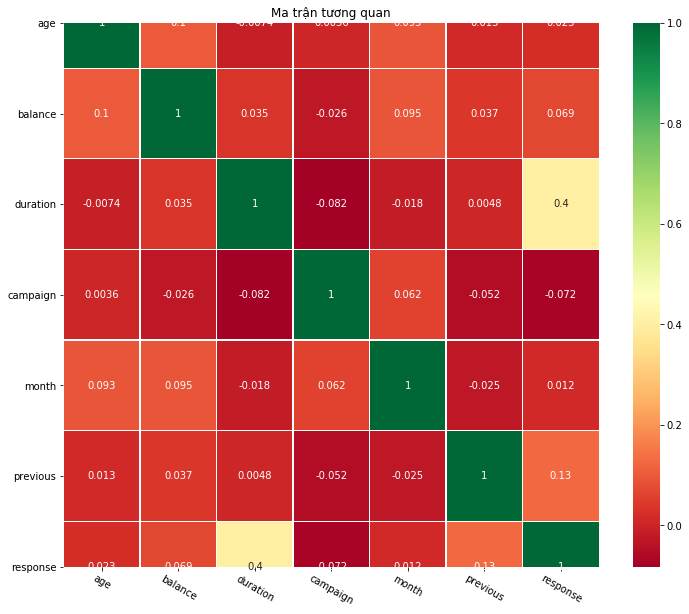

In [0]:
#Ma trận tương quan
corr_data = data[['age','balance','duration','campaign','month','previous','response']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Ma trận tương quan')
plt.show()

In [0]:
#Ta thấy, mức độ liên quan của lần gọi trước với kết quả tham gia hay không tham gia có mối tương quan khá cao.

# Part 3. Data Visualizaton

In [0]:
data=data.drop('balance_outlier', axis=1)

In [0]:
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,5,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,5,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,5,1.27,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,5,5,2.32,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,5,5,3.62,1,-1,0,unknown,0


In [0]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age'] = 50
    column.loc[column["age"] >= 60, 'age'] = 60
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,50,management,married,tertiary,no,2143,yes,no,5,5,4.35,1,-1,0,unknown,0
1,40,technician,single,secondary,no,29,yes,no,5,5,2.52,1,-1,0,unknown,0
2,30,entrepreneur,married,secondary,no,2,yes,yes,5,5,1.27,1,-1,0,unknown,0
5,30,management,married,tertiary,no,231,yes,no,5,5,2.32,1,-1,0,unknown,0
6,20,management,single,tertiary,no,447,yes,yes,5,5,3.62,1,-1,0,unknown,0


In [0]:
data=data.drop('age_group', axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,50,management,married,tertiary,no,2143,yes,no,5,5,4.35,1,-1,0,unknown,0
1,40,technician,single,secondary,no,29,yes,no,5,5,2.52,1,-1,0,unknown,0
2,30,entrepreneur,married,secondary,no,2,yes,yes,5,5,1.27,1,-1,0,unknown,0
5,30,management,married,tertiary,no,231,yes,no,5,5,2.32,1,-1,0,unknown,0
6,20,management,single,tertiary,no,447,yes,yes,5,5,3.62,1,-1,0,unknown,0


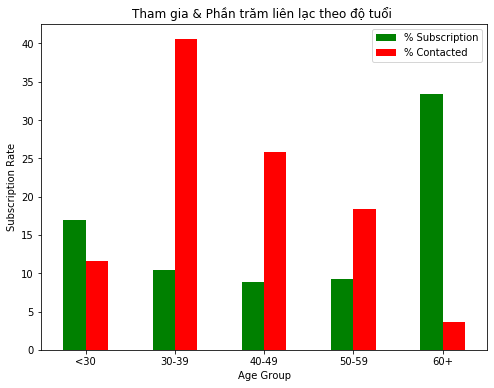

In [0]:
count_age_response_pct = pd.crosstab(data['response'],data['age']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()
age = pd.DataFrame(data['age'].value_counts())
age['% Contacted'] = age['age']*100/age['age'].sum()
age['% Subscription'] = count_age_response_pct[1]
age.drop('age',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Tham gia & Phần trăm liên lạc theo độ tuổi ')
plt.show()

In [0]:
#Ta thấy, những khách hàng ở độ tuổi từ 60 trở lên có tỷ lệ đăng ký cao nhất, đứng thứ hai là độ tuổi tử 18->29. Việc này không khó hiểu khi ta ngoài 60 thì
#ta có xu hướng tiết kiệm hơn sau khi nghỉ hưu so với trung niên, họ có xu hướng tích cực hơn với mục tiêu chính là tạo thu nhập đầu tư cao. Tiền gửi có kỳ hạn là công cụ đầu tư ít
#rủi ro nhất và được ưu tiên hơn so với người lớn tuổi nhất. Đối với người trẻ thì họ không có đủ tiền hoặc kiến thưc chuyên môn để tham gia vào các khoản đầu tư lớn như cổ phiếu nên việc
#gửi tiền có kỳ hạn cung cấp khoản thu nhập cao hơn tài khoản tiết kiệm thông thường
#Tuy nhiên các thanh dọc màu đỏ cho thấy ngân hàng đang tập trung nỗ lực tiếp thị vào nhóm trung niên. Do đó, để làm cho chiến dịch tiệp thị hiệu quả hơn ngân hàng nên nhắm đến đối tượng
#khách hàng trẻ và già hơn trong tương lai.

In [0]:
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,50,management,married,tertiary,no,2143,yes,no,5,5,4.35,1,-1,0,unknown,0
1,40,technician,single,secondary,no,29,yes,no,5,5,2.52,1,-1,0,unknown,0
2,30,entrepreneur,married,secondary,no,2,yes,yes,5,5,1.27,1,-1,0,unknown,0
5,30,management,married,tertiary,no,231,yes,no,5,5,2.32,1,-1,0,unknown,0
6,20,management,single,tertiary,no,447,yes,yes,5,5,3.62,1,-1,0,unknown,0


In [0]:
#Nhìn vào biểu đồ giữa tham gia và tiền dư ta thấy, những khách hàng có tiền dư thấp thì phần trăm dăng ký thấp, điều này không gì nhạc nhiên.
#Khách hàng có số dư trung bình và cao thì phần trăm tham gia gửi tiền cao hơn khoảng 15%. Tuy nhiên trong chiến dịch này, hơn 50% khách hàng chỉ có mức
#số dư hằng năm thấp. Vì thế ngân hàng cần có chính sách chuyển trọng tâm tiếp thị của mình sang khách hàng có số dư cao để đảm bảo tiền gửi có kỳ hạn nhiều hơn.

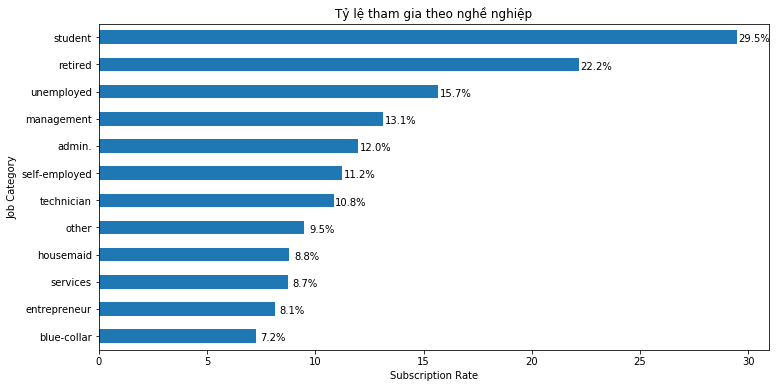

In [0]:
count_job_response_pct = pd.crosstab(data['response'],data['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
plot_job = count_job_response_pct[1].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Tỷ lệ tham gia theo nghề nghiệp')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[1].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [0]:
#Biểu đồ này một lần nửa khẳng định rằng sinh viên (lớp trẻ) và những khách hàng nghỉ hưu có tỉ lệ tham gia gửi tiền có kỳ hạn cao nhất

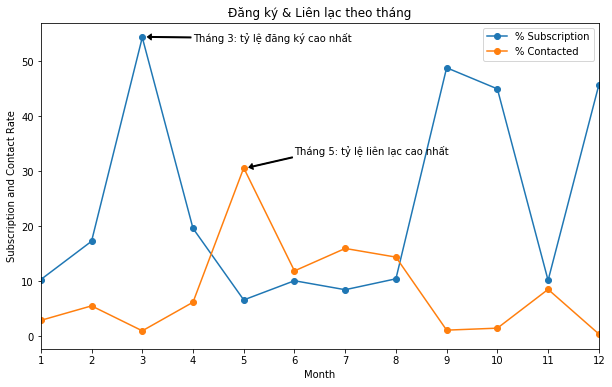

In [0]:
count_month_response_pct = pd.crosstab(data['response'],data['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(data['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct[1]
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Đăng ký & Liên lạc theo tháng')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('Tháng 5: tỷ lệ liên lạc cao nhất', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('Tháng 3: tỷ lệ đăng ký cao nhất', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()


In [0]:
#Bên cạnh đặc điểm khách hàng thì yếu tố bên ngoài cũng ảnh hưởng đến tỷ lệ đăng ký, chẳng hạn như mùa và thời gian gọi. Vì vậy tháng liên lạc theo tháng cũng được phân tích ở đây
#Ngân hàng đã liên hệ với khách hàng hầu hết là tháng 5-> tháng 8, tuy nhiên tỷ lệ đăng ký lại có xu hướng ngược lại so với tỷ lệ liên lạc,
#Đồng thời tỷ lệ đăng ký ở tháng 2->4 và 9->10 lại cao hơn trong khi tỷ lệ liên hệ lại thấp, điều đó cho thấy ngân hàng đang đi sai đường, vì thế ngân hàng nên chuyển thời điểm tiếp thị vào mùa xuân và mùa thu
#để nâng cao hiệu quả tiếp thị.
#Tuy nhiên, ngân hàng phải thận trọng bởi vì yếu tố này có thể mang tính chất thời gian nên có thể thay đổi quan từng năm.

In [0]:
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response
0,50,management,married,tertiary,no,2143,yes,no,5,5,4.35,1,-1,0,unknown,0
1,40,technician,single,secondary,no,29,yes,no,5,5,2.52,1,-1,0,unknown,0
2,30,entrepreneur,married,secondary,no,2,yes,yes,5,5,1.27,1,-1,0,unknown,0
5,30,management,married,tertiary,no,231,yes,no,5,5,2.32,1,-1,0,unknown,0
6,20,management,single,tertiary,no,447,yes,yes,5,5,3.62,1,-1,0,unknown,0


# Part 4. Normalization Data

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data['job']      = labelencoder_X.fit_transform(data['job']) 
data['marital']  = labelencoder_X.fit_transform(data['marital']) 
data['education']= labelencoder_X.fit_transform(data['education']) 
data['default']  = labelencoder_X.fit_transform(data['default']) 
data['housing']  = labelencoder_X.fit_transform(data['housing']) 
data['loan']     = labelencoder_X.fit_transform(data['loan'])
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,50,4,1,2,0,2143,1,0,5,5,4.35,1,-1,0,unknown,0
1,40,9,2,1,0,29,1,0,5,5,2.52,1,-1,0,unknown,0
2,30,2,1,1,0,2,1,1,5,5,1.27,1,-1,0,unknown,0
5,30,4,1,2,0,231,1,0,5,5,2.32,1,-1,0,unknown,0
6,20,4,2,2,0,447,1,1,5,5,3.62,1,-1,0,unknown,0


In [0]:
data['poutcome'].replace(['unknown', 'failure', 'other', 'success'],[1,2,3,4], inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,50,4,1,2,0,2143,1,0,5,5,4.35,1,-1,0,1,0
1,40,9,2,1,0,29,1,0,5,5,2.52,1,-1,0,1,0
2,30,2,1,1,0,2,1,1,5,5,1.27,1,-1,0,1,0
5,30,4,1,2,0,231,1,0,5,5,2.32,1,-1,0,1,0
6,20,4,2,2,0,447,1,1,5,5,3.62,1,-1,0,1,0


In [0]:
data.to_csv('Trained_Data_Plus.csv')